<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-31 11:28:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.08s   

2023-08-31 11:28:56 (2.04 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,
index_col = ["Date"]     # Parse the date column and tell pandas column 1 is a datetime
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


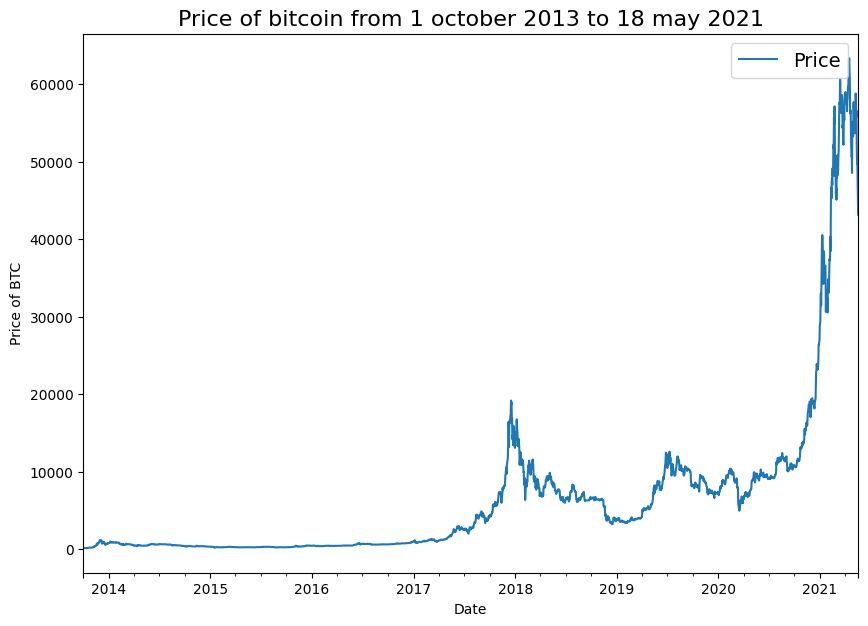

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

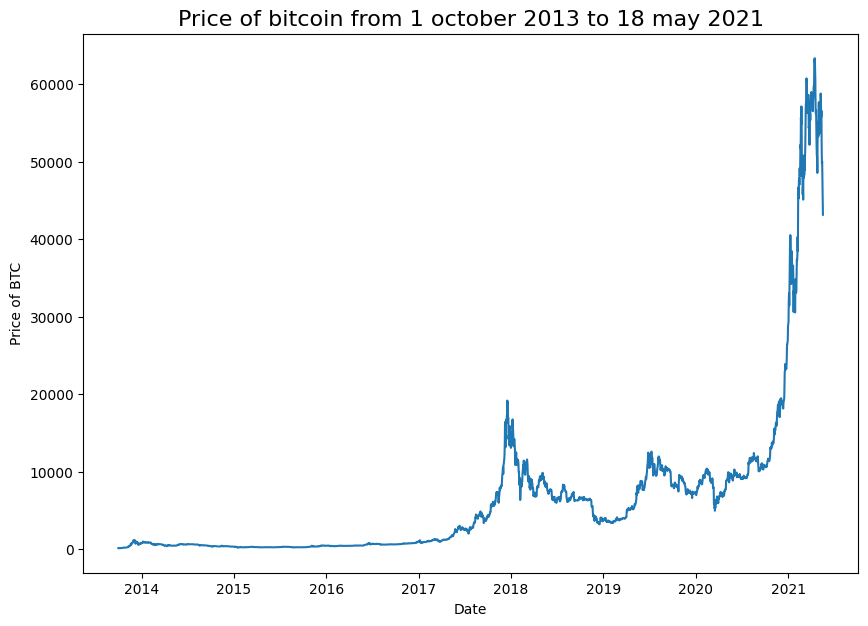

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

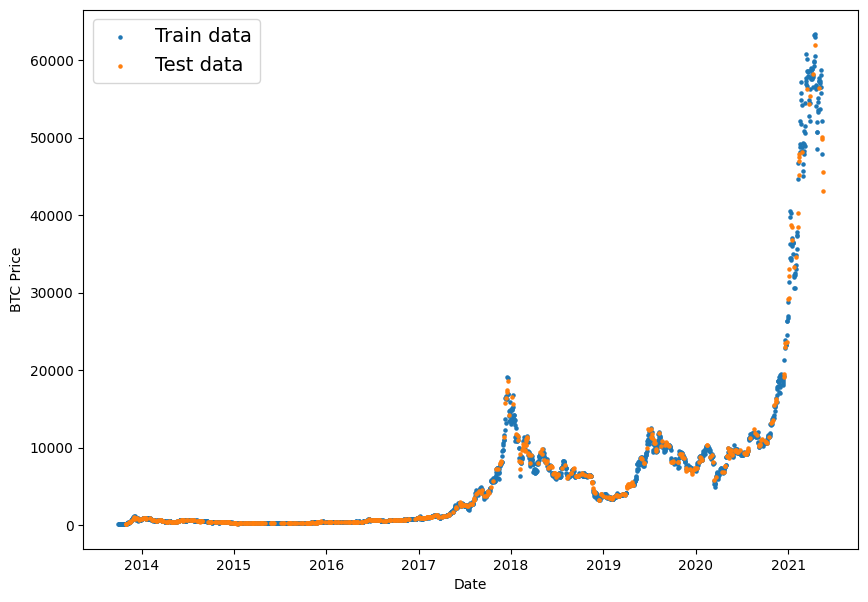

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

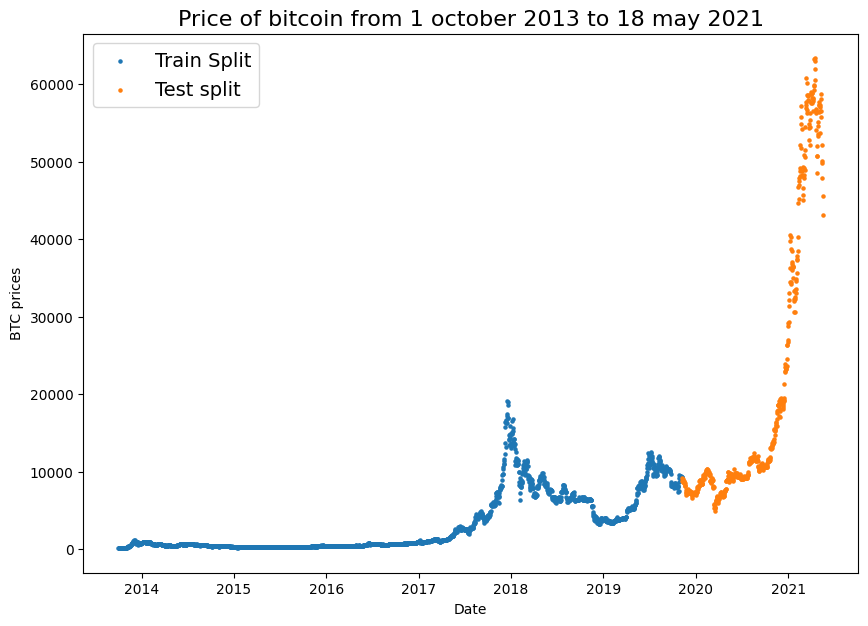

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


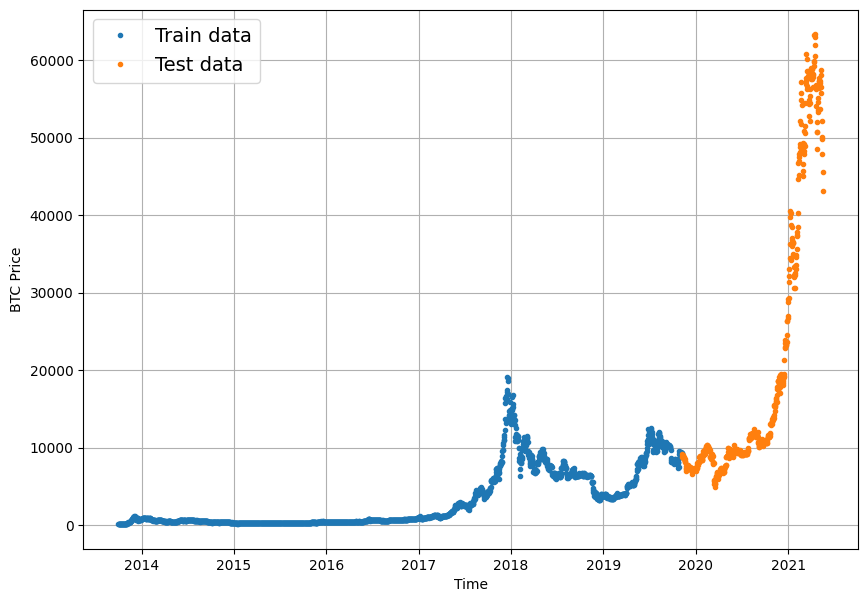

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

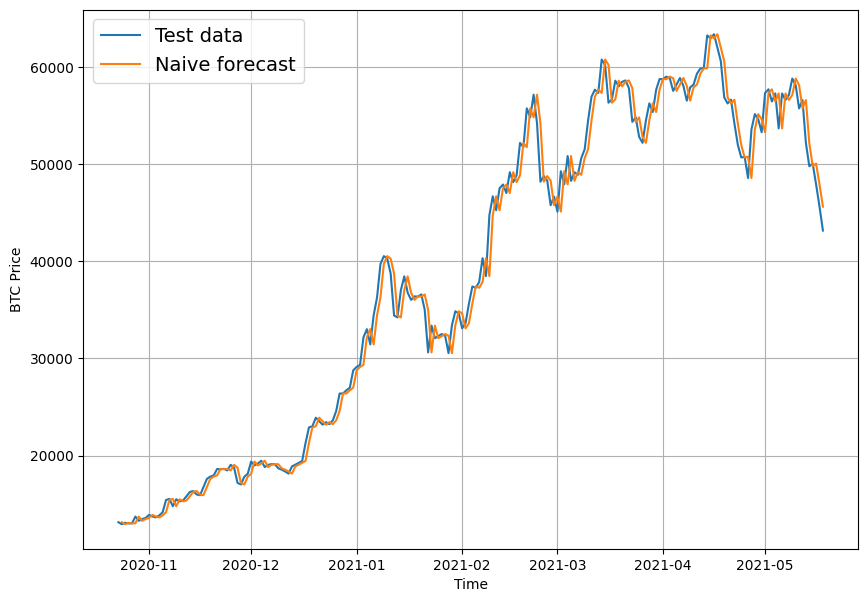

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1588.8909 - mae: 1588.8909

18/18 [==============================] - 4s 131ms/step - loss: 1561.3108 - mae: 1561.3108 - val_loss: 2514.6338 - val_mae: 2514.6338
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 396.1325 - mae: 396.1325

18/18 [==============================] - 2s 106ms/step - loss: 393.0317 - mae: 393.0317 - val_loss: 2008.3336 - val_mae: 2008.3336
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 233.9331 - mae: 233.9331

18/18 [==============================] - 1s 76ms/step - loss: 233.9331 - mae: 233.9331 - val_loss: 1423.7406 - val_mae: 1423.7406
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 206.0700 - mae: 206.0700

18/18 [==============================] - 2s 125ms/step - loss: 205.2723 - mae: 205.2723 - val_loss: 1152.1925 - val_mae: 1152.1925
Epoch 5/100
 7/18 [==========>...................] - ETA: 0s - loss: 216.4673 - mae: 216.4673

18/18 [==============================] - 1s 74ms/step - loss: 198.3158 - mae: 198.3158 - val_loss: 1076.0956 - val_mae: 1076.0956
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 187.6469 - mae: 187.6469

18/18 [==============================] - 2s 128ms/step - loss: 191.5469 - mae: 191.5469 - val_loss: 1067.8124 - val_mae: 1067.8124
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 189.0029 - mae: 189.0029

18/18 [==============================] - 2s 92ms/step - loss: 183.8243 - mae: 183.8243 - val_loss: 1059.7262 - val_mae: 1059.7262
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 177.6105 - mae: 177.6105

18/18 [==============================] - 2s 119ms/step - loss: 177.8995 - mae: 177.8995 - val_loss: 971.9022 - val_mae: 971.9022
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 170.9613 - mae: 170.9613 - val_loss: 976.1426 - val_mae: 976.1426
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 161.8026 - mae: 161.8026

18/18 [==============================] - 2s 122ms/step - loss: 166.0279 - mae: 166.0279 - val_loss: 901.9922 - val_mae: 901.9922
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 158.6624 - mae: 158.6624

18/18 [==============================] - 1s 75ms/step - loss: 158.3142 - mae: 158.3142 - val_loss: 873.2803 - val_mae: 873.2803
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 152.4223 - mae: 152.4223

18/18 [==============================] - 1s 81ms/step - loss: 152.4223 - mae: 152.4223 - val_loss: 871.2258 - val_mae: 871.2258
Epoch 13/100
18/18 [==============================] - 0s 15ms/step - loss: 151.1203 - mae: 151.1203 - val_loss: 967.5009 - val_mae: 967.5009
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 160.3317 - mae: 160.3317

18/18 [==============================] - 1s 37ms/step - loss: 148.4559 - mae: 148.4559 - val_loss: 844.3970 - val_mae: 844.3970
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6397 - mae: 142.6397

18/18 [==============================] - 1s 38ms/step - loss: 140.4595 - mae: 140.4595 - val_loss: 765.3478 - val_mae: 765.3478
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 134.1249 - mae: 134.1249 - val_loss: 780.1234 - val_mae: 780.1234
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9440 - mae: 131.9440 - val_loss: 784.1025 - val_mae: 784.1025
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 143.8091 - mae: 143.8091

18/18 [==============================] - 1s 40ms/step - loss: 131.9158 - mae: 131.9158 - val_loss: 756.2611 - val_mae: 756.2611
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 125.6541 - mae: 125.6541 - val_loss: 801.4582 - val_mae: 801.4582
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 140.9176 - mae: 140.9176

18/18 [==============================] - 1s 54ms/step - loss: 124.8986 - mae: 124.8986 - val_loss: 698.7388 - val_mae: 698.7388
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 158.5165 - mae: 158.5165

18/18 [==============================] - 1s 53ms/step - loss: 124.9580 - mae: 124.9580 - val_loss: 672.4390 - val_mae: 672.4390
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 119.7106 - mae: 119.7106 - val_loss: 680.5679 - val_mae: 680.5679
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 119.1125 - mae: 119.1125

18/18 [==============================] - 1s 42ms/step - loss: 121.0027 - mae: 121.0027 - val_loss: 643.0879 - val_mae: 643.0879
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 124.2312 - mae: 124.2312

18/18 [==============================] - 1s 36ms/step - loss: 119.5646 - mae: 119.5646 - val_loss: 637.3373 - val_mae: 637.3373
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3594 - mae: 121.3594

18/18 [==============================] - 1s 38ms/step - loss: 116.8844 - mae: 116.8844 - val_loss: 628.2431 - val_mae: 628.2431
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5416 - mae: 115.5416 - val_loss: 632.1926 - val_mae: 632.1926
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 160.6740 - mae: 160.6740

18/18 [==============================] - 1s 36ms/step - loss: 117.3760 - mae: 117.3760 - val_loss: 617.1337 - val_mae: 617.1337
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 102.9233 - mae: 102.9233

18/18 [==============================] - 1s 38ms/step - loss: 114.0962 - mae: 114.0962 - val_loss: 611.0268 - val_mae: 611.0268
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4193 - mae: 110.4193

18/18 [==============================] - 1s 37ms/step - loss: 115.1432 - mae: 115.1432 - val_loss: 609.0848 - val_mae: 609.0848
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0257 - mae: 116.0257 - val_loss: 615.6986 - val_mae: 615.6986
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2345 - mae: 123.2345

18/18 [==============================] - 1s 57ms/step - loss: 112.7095 - mae: 112.7095 - val_loss: 602.3899 - val_mae: 602.3899
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1126 - mae: 111.1126 - val_loss: 616.6934 - val_mae: 616.6934
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8629 - mae: 112.8629 - val_loss: 651.4267 - val_mae: 651.4267
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5737 - mae: 140.5737

18/18 [==============================] - 1s 35ms/step - loss: 112.0957 - mae: 112.0957 - val_loss: 598.5369 - val_mae: 598.5369
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4374 - mae: 111.4374 - val_loss: 600.6819 - val_mae: 600.6819
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.3562 - mae: 153.3562

18/18 [==============================] - 1s 35ms/step - loss: 113.1759 - mae: 113.1759 - val_loss: 588.9691 - val_mae: 588.9691
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0965 - mae: 110.0965 - val_loss: 595.2056 - val_mae: 595.2056
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2679 - mae: 100.2679

18/18 [==============================] - 1s 36ms/step - loss: 111.8270 - mae: 111.8270 - val_loss: 586.5991 - val_mae: 586.5991
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 129.1782 - mae: 129.1782

18/18 [==============================] - 1s 36ms/step - loss: 111.6138 - mae: 111.6138 - val_loss: 584.5815 - val_mae: 584.5815
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2385 - mae: 109.2385 - val_loss: 584.9044 - val_mae: 584.9044
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4374 - mae: 110.4374 - val_loss: 620.9326 - val_mae: 620.9326
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2246 - mae: 117.2246 - val_loss: 637.5193 - val_mae: 637.5193
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5919 - mae: 115.5919 - val_loss: 657.4475 - val_mae: 657.4475
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 74.2345 - mae: 74.2345

18/18 [==============================] - 1s 37ms/step - loss: 113.5945 - mae: 113.5945 - val_loss: 580.9077 - val_mae: 580.9077
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3862 - mae: 108.3862 - val_loss: 583.8405 - val_mae: 583.8405
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8782 - mae: 110.8782 - val_loss: 588.3942 - val_mae: 588.3942
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9418 - mae: 109.9418 - val_loss: 615.7755 - val_mae: 615.7755
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0687 - mae: 110.0687 - val_loss: 611.3138 - val_mae: 611.3138
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8981 - mae: 112.8981 - val_loss: 607.5889 - val_mae: 607.5889
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9689 - mae: 113.9689 - val_loss: 641.0425 - val_mae: 641.0425
Epoch 51/100
18/18 [============

18/18 [==============================] - 1s 38ms/step - loss: 111.4566 - mae: 111.4566 - val_loss: 576.8885 - val_mae: 576.8885
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4692 - mae: 111.4692 - val_loss: 604.3187 - val_mae: 604.3187
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 101.8694 - mae: 101.8694

18/18 [==============================] - 1s 52ms/step - loss: 109.0115 - mae: 109.0115 - val_loss: 574.9802 - val_mae: 574.9802
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5355 - mae: 110.5355 - val_loss: 576.6060 - val_mae: 576.6060
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6425 - mae: 108.6425 - val_loss: 796.7850 - val_mae: 796.7850
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 124.5006 - mae: 124.5006 - val_loss: 600.7709 - val_mae: 600.7709
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0632 - mae: 115.0632 - val_loss: 611.6115 - val_mae: 611.6115
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6986 - mae: 110.6986 - val_loss: 635.5498 - val_mae: 635.5498
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0059 - mae: 111.0059 - val_loss: 636.1031 - val_mae: 636.1031
Epoch 61/100
 1/18 [>...........

18/18 [==============================] - 1s 53ms/step - loss: 110.8410 - mae: 110.8410 - val_loss: 573.0834 - val_mae: 573.0834
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1078 - mae: 108.1078 - val_loss: 575.0546 - val_mae: 575.0546
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3351 - mae: 109.3351 - val_loss: 584.5844 - val_mae: 584.5844
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8637 - mae: 107.8637 - val_loss: 589.3450 - val_mae: 589.3450
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1100 - mae: 108.1100 - val_loss: 584.8913 - val_mae: 584.8913
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9029 - mae: 107.9029 - val_loss: 586.3987 - val_mae: 586.3987
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0400 - mae: 107.0400 - val_loss: 648.1490 - val_mae: 648.1490
Epoch 68/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 109.3631 - mae: 109.3631 - val_loss: 569.8951 - val_mae: 569.8951
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5680 - mae: 106.5680 - val_loss: 575.8435 - val_mae: 575.8435
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3179 - mae: 108.3179 - val_loss: 594.6680 - val_mae: 594.6680
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2295 - mae: 108.2295 - val_loss: 585.7028 - val_mae: 585.7028
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0381 - mae: 109.0381 - val_loss: 626.5540 - val_mae: 626.5540
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4201 - mae: 109.4201 - val_loss: 584.0054 - val_mae: 584.0054
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4265 - mae: 119.4265 - val_loss: 612.4525 - val_mae: 612.4525
Epoch 83/100
18/18 [============

18/18 [==============================] - 1s 36ms/step - loss: 113.5065 - mae: 113.5065 - val_loss: 569.8412 - val_mae: 569.8412
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3897 - mae: 107.3897 - val_loss: 569.9988 - val_mae: 569.9988
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6055 - mae: 107.6055 - val_loss: 571.4398 - val_mae: 571.4398
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9609 - mae: 105.9609 - val_loss: 574.8605 - val_mae: 574.8605
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1205 - mae: 107.1205 - val_loss: 582.0598 - val_mae: 582.0598
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1741 - mae: 107.1741 - val_loss: 573.8895 - val_mae: 573.8895
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4552 - mae: 108.4552 - val_loss: 578.3496 - val_mae: 578.3496
Epoch 91/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 111.5181 - mae: 111.5181 - val_loss: 566.2441 - val_mae: 566.2441
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 114.8123 - mae: 114.8123 - val_loss: 599.9376 - val_mae: 599.9376
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4674 - mae: 112.4674 - val_loss: 578.3278 - val_mae: 578.3278
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7380 - mae: 132.7380

18/18 [==============================] - 1s 36ms/step - loss: 106.5280 - mae: 106.5280 - val_loss: 566.0372 - val_mae: 566.0372
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 106.1845 - mae: 106.1845 - val_loss: 567.9303 - val_mae: 567.9303
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8953 - mae: 105.8953 - val_loss: 566.2590 - val_mae: 566.2590
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0178 - mae: 106.0178 - val_loss: 570.3676 - val_mae: 570.3676
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0433 - mae: 109.0433 - val_loss: 570.7862 - val_mae: 570.7862
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2583 - mae: 116.2583 - val_loss: 685.6900 - val_mae: 685.6900


In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 685.6900 - mae: 685.6900


[685.6900024414062, 685.6900024414062]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.0371 - mae: 566.0371


[566.037109375, 566.037109375]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 1ms/step


array([[ 8864.123 ],
       [ 8769.748 ],
       [ 9037.62  ],
       [ 8798.537 ],
       [ 8742.377 ],
       [ 8747.828 ],
       [ 8701.169 ],
       [ 8519.793 ],
       [ 8469.693 ],
       [ 8535.526 ],
       [ 8265.852 ],
       [ 8114.1943],
       [ 8065.072 ],
       [ 7677.0747],
       [ 7277.017 ],
       [ 7301.3716],
       [ 7102.5283],
       [ 7164.749 ],
       [ 7145.63  ],
       [ 7496.9805],
       [ 7448.412 ],
       [ 7722.8066],
       [ 7609.506 ],
       [ 7440.0273],
       [ 7330.29  ],
       [ 7330.3335],
       [ 7234.208 ],
       [ 7374.554 ],
       [ 7523.7666],
       [ 7571.0884],
       [ 7574.3213],
       [ 7388.2744],
       [ 7256.373 ],
       [ 7198.6484],
       [ 7197.7866],
       [ 7238.088 ],
       [ 7120.691 ],
       [ 7113.3057],
       [ 6919.619 ],
       [ 6617.0396],
       [ 7289.5923],
       [ 7251.2764],
       [ 7181.5923],
       [ 7257.496 ],
       [ 7303.474 ],
       [ 7197.5654],
       [ 7232.3477],
       [ 7240

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 566.0371,
 'mse': 1157592.8,
 'rmse': 1075.9148,
 'mape': 2.54563,
 'mase': 0.9943704}

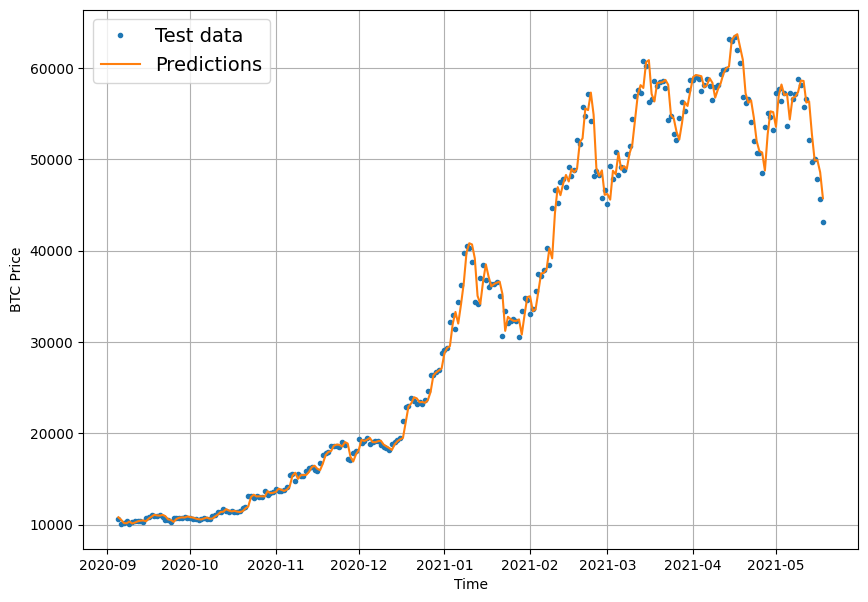

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [47]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [49]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [58]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1066.3375 - mae: 1066.3375 

18/18 [==============================] - 3s 77ms/step - loss: 1031.4553 - mae: 1031.4553 - val_loss: 4641.5430 - val_mae: 4641.5430
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 652.0004 - mae: 652.0004

18/18 [==============================] - 1s 39ms/step - loss: 415.7079 - mae: 415.7079 - val_loss: 1482.1567 - val_mae: 1482.1567
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 323.0604 - mae: 323.0604

18/18 [==============================] - 1s 38ms/step - loss: 281.8794 - mae: 281.8794 - val_loss: 1336.0321 - val_mae: 1336.0321
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 179.3642 - mae: 179.3642

18/18 [==============================] - 1s 37ms/step - loss: 243.3730 - mae: 243.3730 - val_loss: 1265.8336 - val_mae: 1265.8336
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 177.4346 - mae: 177.4346

18/18 [==============================] - 1s 38ms/step - loss: 226.3158 - mae: 226.3158 - val_loss: 1179.9669 - val_mae: 1179.9669
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 283.0956 - mae: 283.0956

18/18 [==============================] - 1s 70ms/step - loss: 220.1406 - mae: 220.1406 - val_loss: 1151.3422 - val_mae: 1151.3422
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 206.7146 - mae: 206.7146

18/18 [==============================] - 1s 39ms/step - loss: 200.7946 - mae: 200.7946 - val_loss: 1073.4258 - val_mae: 1073.4258
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 207.8697 - mae: 207.8697

18/18 [==============================] - 1s 37ms/step - loss: 196.1792 - mae: 196.1792 - val_loss: 1056.7625 - val_mae: 1056.7625
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 184.3896 - mae: 184.3896 - val_loss: 1075.5736 - val_mae: 1075.5736
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 223.7432 - mae: 223.7432

18/18 [==============================] - 1s 38ms/step - loss: 185.6579 - mae: 185.6579 - val_loss: 1036.8768 - val_mae: 1036.8768
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 189.2743 - mae: 189.2743

18/18 [==============================] - 1s 39ms/step - loss: 179.8327 - mae: 179.8327 - val_loss: 947.4473 - val_mae: 947.4473
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 170.8833 - mae: 170.8833 - val_loss: 1141.0786 - val_mae: 1141.0786
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 197.2754 - mae: 197.2754

18/18 [==============================] - 1s 38ms/step - loss: 174.3943 - mae: 174.3943 - val_loss: 907.7208 - val_mae: 907.7208
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 163.1011 - mae: 163.1011 - val_loss: 956.5095 - val_mae: 956.5095
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 186.1572 - mae: 186.1572

18/18 [==============================] - 1s 42ms/step - loss: 164.1720 - mae: 164.1720 - val_loss: 876.6945 - val_mae: 876.6945
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 164.5436 - mae: 164.5436

18/18 [==============================] - 1s 55ms/step - loss: 166.1957 - mae: 166.1957 - val_loss: 863.5784 - val_mae: 863.5784
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 150.7254 - mae: 150.7254 - val_loss: 1221.9933 - val_mae: 1221.9933
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 164.2587 - mae: 164.2587 - val_loss: 919.3013 - val_mae: 919.3013
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 156.1391 - mae: 156.1391 - val_loss: 1279.5016 - val_mae: 1279.5016
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 174.1029 - mae: 174.1029 - val_loss: 914.5087 - val_mae: 914.5087
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 166.6564 - mae: 166.6564

18/18 [==============================] - 1s 55ms/step - loss: 166.8705 - mae: 166.8705 - val_loss: 789.9357 - val_mae: 789.9357
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 153.9895 - mae: 153.9895 - val_loss: 823.4274 - val_mae: 823.4274
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 150.4415 - mae: 150.4415 - val_loss: 1178.4303 - val_mae: 1178.4303
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 224.2355 - mae: 224.2355

18/18 [==============================] - 1s 38ms/step - loss: 154.6940 - mae: 154.6940 - val_loss: 780.1899 - val_mae: 780.1899
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 146.9608 - mae: 146.9608 - val_loss: 787.9012 - val_mae: 787.9012
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 147.6557 - mae: 147.6557 - val_loss: 815.5368 - val_mae: 815.5368
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 152.2691 - mae: 152.2691 - val_loss: 859.0806 - val_mae: 859.0806
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 143.2058 - mae: 143.2058 - val_loss: 904.3691 - val_mae: 904.3691
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 140.3480 - mae: 140.3480 - val_loss: 1110.6008 - val_mae: 1110.6008
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 175.1700 - mae: 175.1700 - val_loss: 1087.3103 - val_mae: 1087.3103
Epoch 31/100
 1/18 [>.......

18/18 [==============================] - 1s 36ms/step - loss: 159.4537 - mae: 159.4537 - val_loss: 757.5538 - val_mae: 757.5538
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 154.8959 - mae: 154.8959 - val_loss: 771.4416 - val_mae: 771.4416
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 142.2866 - mae: 142.2866 - val_loss: 790.2635 - val_mae: 790.2635
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 140.8624 - mae: 140.8624

18/18 [==============================] - 1s 37ms/step - loss: 138.8329 - mae: 138.8329 - val_loss: 735.9276 - val_mae: 735.9276
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 141.6000 - mae: 141.6000 - val_loss: 845.0249 - val_mae: 845.0249
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 150.9495 - mae: 150.9495 - val_loss: 753.3043 - val_mae: 753.3043
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 159.1207 - mae: 159.1207 - val_loss: 751.2922 - val_mae: 751.2922
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 158.5221 - mae: 158.5221

18/18 [==============================] - 1s 37ms/step - loss: 137.7368 - mae: 137.7368 - val_loss: 723.0536 - val_mae: 723.0536
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 133.3651 - mae: 133.3651 - val_loss: 895.2897 - val_mae: 895.2897
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 148.7756 - mae: 148.7756 - val_loss: 791.6788 - val_mae: 791.6788
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 131.4931 - mae: 131.4931 - val_loss: 809.3366 - val_mae: 809.3366
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6946 - mae: 125.6946

18/18 [==============================] - 1s 39ms/step - loss: 151.8872 - mae: 151.8872 - val_loss: 719.2781 - val_mae: 719.2781
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 136.8893 - mae: 136.8893 - val_loss: 876.6449 - val_mae: 876.6449
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 145.2608 - mae: 145.2608 - val_loss: 751.3194 - val_mae: 751.3194
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 155.2187 - mae: 155.2187

18/18 [==============================] - 1s 38ms/step - loss: 136.1251 - mae: 136.1251 - val_loss: 713.6348 - val_mae: 713.6348
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4365 - mae: 110.4365

18/18 [==============================] - 1s 38ms/step - loss: 138.0761 - mae: 138.0761 - val_loss: 709.0525 - val_mae: 709.0525
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 134.9552 - mae: 134.9552 - val_loss: 779.4086 - val_mae: 779.4086
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 103.9728 - mae: 103.9728

18/18 [==============================] - 1s 39ms/step - loss: 131.1314 - mae: 131.1314 - val_loss: 700.9344 - val_mae: 700.9344
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 129.2930 - mae: 129.2930 - val_loss: 740.2223 - val_mae: 740.2223
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 135.2976 - mae: 135.2976 - val_loss: 752.2741 - val_mae: 752.2741
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 129.8062 - mae: 129.8062 - val_loss: 739.4228 - val_mae: 739.4228
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1960 - mae: 138.1960

18/18 [==============================] - 1s 36ms/step - loss: 131.5331 - mae: 131.5331 - val_loss: 678.6151 - val_mae: 678.6151
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 135.2401 - mae: 135.2401 - val_loss: 815.6237 - val_mae: 815.6237
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 138.9204 - mae: 138.9204 - val_loss: 876.2930 - val_mae: 876.2930
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 153.5618 - mae: 153.5618 - val_loss: 939.3689 - val_mae: 939.3690
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 176.5837 - mae: 176.5837

18/18 [==============================] - 1s 37ms/step - loss: 171.7979 - mae: 171.7979 - val_loss: 670.4714 - val_mae: 670.4714
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 122.4028 - mae: 122.4028

18/18 [==============================] - 1s 39ms/step - loss: 126.2602 - mae: 126.2602 - val_loss: 666.7736 - val_mae: 666.7736
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2655 - mae: 118.2655

18/18 [==============================] - 1s 44ms/step - loss: 123.9040 - mae: 123.9040 - val_loss: 665.6227 - val_mae: 665.6227
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 155.6228 - mae: 155.6228 - val_loss: 670.9716 - val_mae: 670.9716
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 126.1686 - mae: 126.1686 - val_loss: 667.1215 - val_mae: 667.1215
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 124.9792 - mae: 124.9792 - val_loss: 688.9246 - val_mae: 688.9246
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 127.9088 - mae: 127.9088 - val_loss: 810.7112 - val_mae: 810.7112
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8483 - mae: 129.8483

18/18 [==============================] - 1s 55ms/step - loss: 134.1654 - mae: 134.1654 - val_loss: 665.5898 - val_mae: 665.5898
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 136.2953 - mae: 136.2953

18/18 [==============================] - 1s 55ms/step - loss: 136.2953 - mae: 136.2953 - val_loss: 656.3435 - val_mae: 656.3435
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 124.6122 - mae: 124.6122

18/18 [==============================] - 1s 39ms/step - loss: 136.8805 - mae: 136.8805 - val_loss: 653.6702 - val_mae: 653.6702
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 145.4091 - mae: 145.4091 - val_loss: 655.1890 - val_mae: 655.1890
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 133.7166 - mae: 133.7166 - val_loss: 836.0583 - val_mae: 836.0583
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9041 - mae: 124.9041 - val_loss: 835.1707 - val_mae: 835.1707
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 126.1567 - mae: 126.1567 - val_loss: 957.2981 - val_mae: 957.2981
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 188.2489 - mae: 188.2489

18/18 [==============================] - 1s 37ms/step - loss: 131.0359 - mae: 131.0359 - val_loss: 652.8848 - val_mae: 652.8848
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 128.2487 - mae: 128.2487 - val_loss: 906.9382 - val_mae: 906.9382
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 132.3525 - mae: 132.3525 - val_loss: 835.2878 - val_mae: 835.2878
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1138 - mae: 138.1138 - val_loss: 1027.1790 - val_mae: 1027.1790
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 217.7991 - mae: 217.7991

18/18 [==============================] - 1s 38ms/step - loss: 141.3077 - mae: 141.3077 - val_loss: 643.3353 - val_mae: 643.3353
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 135.3391 - mae: 135.3391 - val_loss: 799.1520 - val_mae: 799.1520
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 148.7287 - mae: 148.7287 - val_loss: 794.4523 - val_mae: 794.4523
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 146.0804 - mae: 146.0804 - val_loss: 736.0967 - val_mae: 736.0967
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 141.9278 - mae: 141.9278 - val_loss: 780.1274 - val_mae: 780.1274
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 131.2710 - mae: 131.2710 - val_loss: 710.7751 - val_mae: 710.7751
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 119.8650 - mae: 119.8650 - val_loss: 762.6677 - val_mae: 762.6677
Epoch 81/100
18/18 [============

18/18 [==============================] - 1s 37ms/step - loss: 136.8427 - mae: 136.8427 - val_loss: 634.8486 - val_mae: 634.8486
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 119.9079 - mae: 119.9079 - val_loss: 651.5506 - val_mae: 651.5506
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 128.6647 - mae: 128.6647 - val_loss: 675.6844 - val_mae: 675.6844
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 126.8590 - mae: 126.8590 - val_loss: 748.5251 - val_mae: 748.5251
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 125.9716 - mae: 125.9716 - val_loss: 730.6996 - val_mae: 730.6996
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 132.7528 - mae: 132.7528 - val_loss: 688.4105 - val_mae: 688.4105
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 167.4462 - mae: 167.4462

18/18 [==============================] - 1s 83ms/step - loss: 131.4864 - mae: 131.4864 - val_loss: 633.2757 - val_mae: 633.2757
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1618 - mae: 124.1618 - val_loss: 684.4415 - val_mae: 684.4415
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 131.7993 - mae: 131.7993 - val_loss: 845.4600 - val_mae: 845.4600
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 142.1283 - mae: 142.1283 - val_loss: 1047.6874 - val_mae: 1047.6874
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 133.1957 - mae: 133.1957 - val_loss: 674.3613 - val_mae: 674.3613
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0037 - mae: 123.0037 - val_loss: 639.6769 - val_mae: 639.6769
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0879 - mae: 115.0879 - val_loss: 732.1237 - val_mae: 732.1237
Epoch 98/100
18/18 [==========

18/18 [==============================] - 1s 39ms/step - loss: 118.2790 - mae: 118.2790 - val_loss: 625.3719 - val_mae: 625.3719
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 124.3651 - mae: 124.3651 - val_loss: 640.8435 - val_mae: 640.8435


In [59]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.3719 - mae: 625.3719


[625.3719482421875, 625.3719482421875]

In [60]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [61]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 625.37195,
 'mse': 1341023.8,
 'rmse': 1158.0258,
 'mape': 2.8125613,
 'mase': 1.0931562}

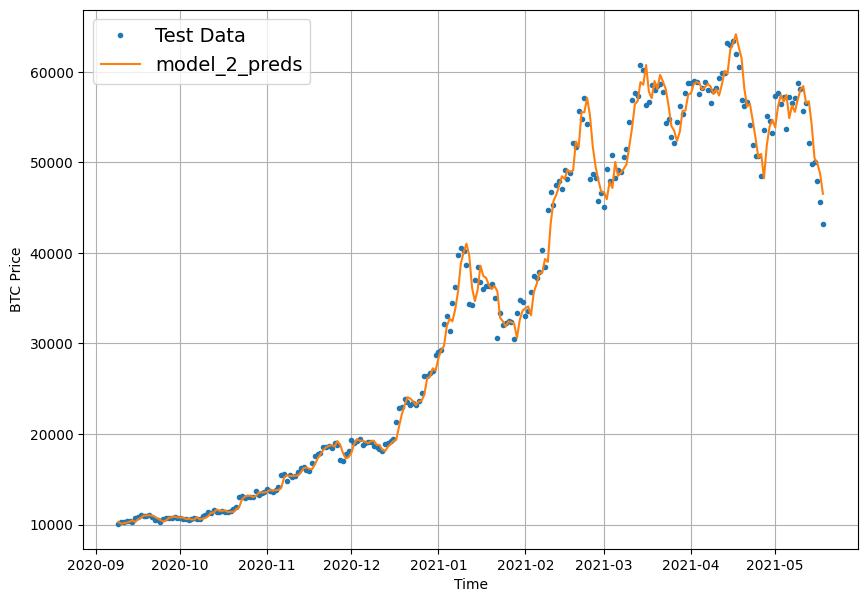

In [62]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [63]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [64]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [72]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2111.5518 - mae: 2111.5518 

18/18 [==============================] - 5s 142ms/step - loss: 1663.1045 - mae: 1663.1045 - val_loss: 3573.3943 - val_mae: 3573.3943
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 557.6931 - mae: 557.6931

18/18 [==============================] - 1s 39ms/step - loss: 509.3732 - mae: 509.3732 - val_loss: 2217.0759 - val_mae: 2217.0759
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 389.2704 - mae: 389.2704

18/18 [==============================] - 1s 39ms/step - loss: 396.6753 - mae: 396.6753 - val_loss: 2034.7618 - val_mae: 2034.7618
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 434.6138 - mae: 434.6138

18/18 [==============================] - 1s 38ms/step - loss: 368.7064 - mae: 368.7064 - val_loss: 1951.6082 - val_mae: 1951.6082
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 351.1126 - mae: 351.1126 - val_loss: 1981.7922 - val_mae: 1981.7922
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 295.0786 - mae: 295.0786

18/18 [==============================] - 1s 38ms/step - loss: 337.1201 - mae: 337.1201 - val_loss: 1795.4591 - val_mae: 1795.4591
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 300.6891 - mae: 300.6891

18/18 [==============================] - 1s 38ms/step - loss: 321.7632 - mae: 321.7632 - val_loss: 1732.3502 - val_mae: 1732.3502
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 290.7464 - mae: 290.7464

18/18 [==============================] - 1s 38ms/step - loss: 313.9104 - mae: 313.9104 - val_loss: 1646.5864 - val_mae: 1646.5864
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 307.0692 - mae: 307.0692 - val_loss: 1939.9675 - val_mae: 1939.9675
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 314.5208 - mae: 314.5208 - val_loss: 1668.5238 - val_mae: 1668.5238
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 333.4987 - mae: 333.4987

18/18 [==============================] - 1s 38ms/step - loss: 298.7346 - mae: 298.7346 - val_loss: 1636.9478 - val_mae: 1636.9478
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 286.8708 - mae: 286.8708 - val_loss: 1739.2804 - val_mae: 1739.2804
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 255.1970 - mae: 255.1970

18/18 [==============================] - 1s 40ms/step - loss: 282.3398 - mae: 282.3398 - val_loss: 1550.8104 - val_mae: 1550.8104
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 275.7071 - mae: 275.7071

18/18 [==============================] - 1s 40ms/step - loss: 278.8766 - mae: 278.8766 - val_loss: 1537.9507 - val_mae: 1537.9507
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 277.9263 - mae: 277.9263 - val_loss: 1720.9502 - val_mae: 1720.9502
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 273.4264 - mae: 273.4264 - val_loss: 1585.3557 - val_mae: 1585.3557
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 266.2930 - mae: 266.2930 - val_loss: 1578.4417 - val_mae: 1578.4417
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 264.7592 - mae: 264.7592 - val_loss: 1716.6130 - val_mae: 1716.6130
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 261.6353 - mae: 261.6353 - val_loss: 1664.6295 - val_mae: 1664.6295
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 245.1571 - mae: 245.1571

18/18 [==============================] - 1s 39ms/step - loss: 262.7867 - mae: 262.7867 - val_loss: 1521.7330 - val_mae: 1521.7330
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 308.1908 - mae: 308.1908

18/18 [==============================] - 1s 39ms/step - loss: 255.8215 - mae: 255.8215 - val_loss: 1491.9009 - val_mae: 1491.9009
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 337.2601 - mae: 337.2601

18/18 [==============================] - 1s 47ms/step - loss: 256.9991 - mae: 256.9991 - val_loss: 1417.1332 - val_mae: 1417.1332
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 258.9242 - mae: 258.9242

18/18 [==============================] - 1s 57ms/step - loss: 254.2609 - mae: 254.2609 - val_loss: 1379.5040 - val_mae: 1379.5040
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 267.8221 - mae: 267.8221 - val_loss: 1380.4088 - val_mae: 1380.4088
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 255.7141 - mae: 255.7141 - val_loss: 1628.6876 - val_mae: 1628.6876
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 253.6089 - mae: 253.6089 - val_loss: 1427.9950 - val_mae: 1427.9950
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 246.4450 - mae: 246.4450 - val_loss: 1428.1349 - val_mae: 1428.1349
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 247.3857 - mae: 247.3857 - val_loss: 1443.9585 - val_mae: 1443.9585
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 249.2106 - mae: 249.2106 - val_loss: 1557.9701 - val_mae: 1557.9701
Epoch 30/100
18/18

18/18 [==============================] - 1s 47ms/step - loss: 241.2266 - mae: 241.2266 - val_loss: 1349.8547 - val_mae: 1349.8547
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 242.3422 - mae: 242.3422 - val_loss: 1351.6028 - val_mae: 1351.6028
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 233.4221 - mae: 233.4221

18/18 [==============================] - 1s 40ms/step - loss: 248.9583 - mae: 248.9583 - val_loss: 1339.3505 - val_mae: 1339.3505
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 244.4567 - mae: 244.4567 - val_loss: 1343.3926 - val_mae: 1343.3926
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 241.2425 - mae: 241.2425 - val_loss: 1403.3942 - val_mae: 1403.3942
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 243.7042 - mae: 243.7042 - val_loss: 1340.7990 - val_mae: 1340.7990
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 252.3700 - mae: 252.3700 - val_loss: 1361.6581 - val_mae: 1361.6581
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 243.3031 - mae: 243.3031 - val_loss: 1407.5244 - val_mae: 1407.5244
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 243.7380 - mae: 243.7380 - val_loss: 1438.6672 - val_mae: 1438.6672
Epoch 40/100
18/18

18/18 [==============================] - 1s 38ms/step - loss: 236.5330 - mae: 236.5330 - val_loss: 1313.9667 - val_mae: 1313.9667
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 244.9102 - mae: 244.9102

18/18 [==============================] - 1s 40ms/step - loss: 240.7542 - mae: 240.7542 - val_loss: 1296.6187 - val_mae: 1296.6187
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 237.0353 - mae: 237.0353 - val_loss: 1441.3113 - val_mae: 1441.3113
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 236.5812 - mae: 236.5812 - val_loss: 1297.2792 - val_mae: 1297.2792
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 234.4070 - mae: 234.4070 - val_loss: 1352.5140 - val_mae: 1352.5140
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 236.8085 - mae: 236.8085 - val_loss: 1311.5107 - val_mae: 1311.5107
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 241.5379 - mae: 241.5379 - val_loss: 1407.4202 - val_mae: 1407.4202
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 240.8788 - mae: 240.8788 - val_loss: 1306.5043 - val_mae: 1306.5043
Epoch 51/100
18/18

18/18 [==============================] - 1s 37ms/step - loss: 232.6432 - mae: 232.6432 - val_loss: 1286.7452 - val_mae: 1286.7452
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 265.8936 - mae: 265.8936

18/18 [==============================] - 1s 39ms/step - loss: 236.7939 - mae: 236.7939 - val_loss: 1282.6552 - val_mae: 1282.6552
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 234.0670 - mae: 234.0670 - val_loss: 1309.6290 - val_mae: 1309.6290
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 232.7827 - mae: 232.7827 - val_loss: 1311.3577 - val_mae: 1311.3577
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 233.7306 - mae: 233.7306 - val_loss: 1379.0276 - val_mae: 1379.0276
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 234.3254 - mae: 234.3254 - val_loss: 1283.9229 - val_mae: 1283.9229
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 232.6538 - mae: 232.6538 - val_loss: 1286.9666 - val_mae: 1286.9666
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 214.0952 - mae: 214.0952

18/18 [==============================] - 1s 40ms/step - loss: 232.2001 - mae: 232.2001 - val_loss: 1256.3345 - val_mae: 1256.3345
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 230.1835 - mae: 230.1835 - val_loss: 1395.3220 - val_mae: 1395.3220
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 231.5388 - mae: 231.5388 - val_loss: 1276.5549 - val_mae: 1276.5549
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 233.1806 - mae: 233.1806 - val_loss: 1297.0140 - val_mae: 1297.0140
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 228.5601 - mae: 228.5601 - val_loss: 1299.3396 - val_mae: 1299.3396
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 230.3587 - mae: 230.3587 - val_loss: 1347.2545 - val_mae: 1347.2545
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 232.9878 - mae: 232.9878 - val_loss: 1566.2188 - val_mae: 1566.2188
Epoch 67/100
18/18

18/18 [==============================] - 1s 39ms/step - loss: 230.8509 - mae: 230.8509 - val_loss: 1240.5601 - val_mae: 1240.5601
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 227.0270 - mae: 227.0270 - val_loss: 1253.7488 - val_mae: 1253.7488
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 228.6009 - mae: 228.6009 - val_loss: 1303.9666 - val_mae: 1303.9666
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 228.0405 - mae: 228.0405 - val_loss: 1487.7899 - val_mae: 1487.7899
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 228.6056 - mae: 228.6056 - val_loss: 1265.6738 - val_mae: 1265.6738
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 228.6325 - mae: 228.6325 - val_loss: 1246.1448 - val_mae: 1246.1448
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 227.1308 - mae: 227.1308 - val_loss: 1264.5547 - val_mae: 1264.5547
Epoch 79/100
18/18

18/18 [==============================] - 1s 59ms/step - loss: 222.5123 - mae: 222.5123 - val_loss: 1229.5974 - val_mae: 1229.5974
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 225.5007 - mae: 225.5007 - val_loss: 1276.2972 - val_mae: 1276.2972
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 224.5531 - mae: 224.5531 - val_loss: 1340.1145 - val_mae: 1340.1145
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 225.1729 - mae: 225.1729 - val_loss: 1251.0741 - val_mae: 1251.0741
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 226.0170 - mae: 226.0170 - val_loss: 1383.4036 - val_mae: 1383.4036
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 237.3102 - mae: 237.3102 - val_loss: 1378.4050 - val_mae: 1378.4050
Epoch 98/100
18/18 [==============================] - 0s 11ms/step - loss: 224.8168 - mae: 224.8168 - val_loss: 1283.3816 - val_mae: 1283.3816
Epoch 99/100
14/1

18/18 [==============================] - 1s 44ms/step - loss: 222.0522 - mae: 222.0522 - val_loss: 1216.5391 - val_mae: 1216.5391
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 221.6577 - mae: 221.6577 - val_loss: 1397.6442 - val_mae: 1397.6442


In [73]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1216.5391 - mae: 1216.5391


[1216.5390625, 1216.5390625]

In [74]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 3ms/step


In [81]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [82]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([ 680.7952  ,  421.2892  ,  385.02832 ,  405.85922 ,  420.70523 ,
         437.7103  ,  512.05273 ,  587.942   ,  603.5718  ,  588.7359  ,
         821.77264 ,  793.16534 ,  911.5923  ,  894.21027 ,  634.68866 ,
         302.01187 ,  214.97398 ,  189.7094  ,  240.18889 ,  248.7659  ,
         202.88672 ,  177.411   ,  326.47977 ,  415.62918 ,  198.60965 ,
         113.33168 ,  100.82819 ,   91.22614 ,  118.49825 ,  170.5731  ,
         257.6518  ,  372.20844 ,  306.22543 ,  381.5688  ,  253.15633 ,
         290.14914 ,  323.12912 ,  207.4532  ,  175.7394  ,  187.2841  ,
         410.87625 ,   63.555943,   52.63044 ,   50.484097,   70.77051 ,
          94.774414,   81.30553 ,   63.916645,  129.97475 ,   94.263954,
         146.69266 ,  112.74003 ,  149.26305 ,  162.58182 ,  230.38072 ,
         326.00845 ,  505.05463 ,  577.7719  ,  482.70306 ,  545.0548  ,
         418.48062 ,  151.1926  ,  266.32367 ,  365.77756 ,  361.99875 ,
         419.45062 ,  506.57748 ,  508.70883

# Make our evaluation function work for larger horizons

In [83]:
model_2_results["mae"].ndim

0

In [84]:
model_3_results["mae"].ndim

1

In [85]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1216.5391 - mae: 1216.5391


[1216.5390625, 1216.5390625]

In [86]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1216.539

In [89]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [90]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1216.539,
 'mse': 5224574.0,
 'rmse': 1396.0652,
 'mape': 5.47757,
 'mase': 2.1647627}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [93]:
test_labels.shape

(551, 7)

In [95]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9474.011 ,  9157.221 ,  8993.964 ,  9032.454 ,  8975.053 ,
        8900.286 ,  8878.245 ,  8804.959 ,  8624.689 ,  8459.084 ,
        8481.648 ,  8311.049 ,  8289.844 ,  8193.696 ,  7902.384 ,
        7565.43  ,  7429.3794,  7259.281 ,  7205.3013,  7210.6562,
        7497.108 ,  7481.5854,  7711.8228,  7799.528 ,  7606.5474,
        7499.1353,  7423.285 ,  7355.4067,  7341.96  ,  7453.8213,
        7520.1284,  7572.184 ,  7441.9727,  7423.6396,  7322.2085,
        7330.8823,  7339.163 ,  7288.837 ,  7220.0547,  7085.7866,
        6822.929 ,  7180.973 ,  7220.337 ,  7227.5806,  7295.1235,
        7340.8657,  7313.1704,  7300.9536,  7374.833 ,  7232.089 ,
        7266.8906,  7306.366 ,  7364.4985,  7348.3716,  7315.421 ,
        7278.7075,  7152.954 ,  7193.9844,  7405.837 ,  7447.164 ,
        7631.324 ,  8069.5117,  8221.47  ,  8023.2476,  8185.6733,
        8245.155 ,  8218.939 ,  8269.36  ,  8647.06  ,  8948.924 ,
        8931.5

In [96]:
model_3_preds.shape

(551, 7)

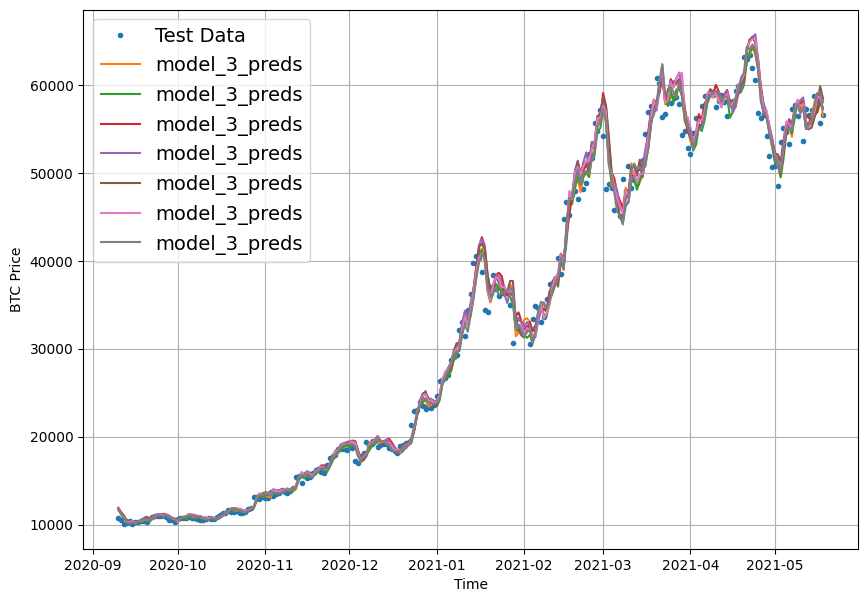

In [91]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

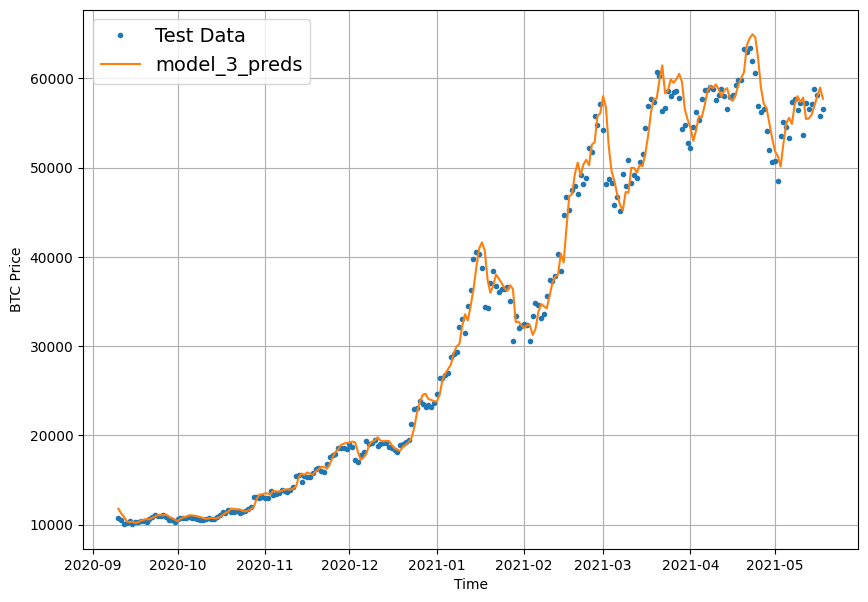

In [97]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

In [ ]:
#

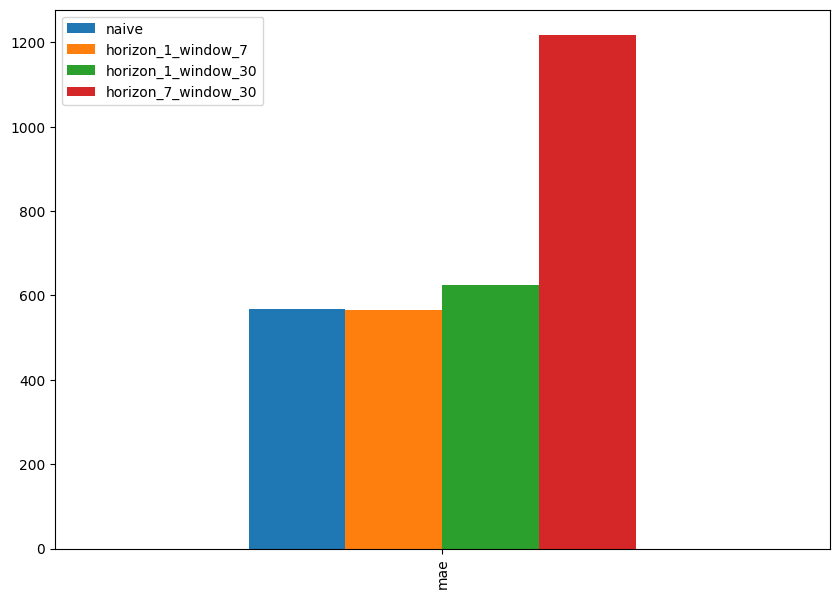

In [99]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424